# Assignment Week 9
## Group Assignment (Group 10)

#### 1. Let $f(x)=x+2/x$.

#### (1) Use quadratic Lagrange interpolation based on the nodes $x_{0}=1$, $x_{1}=2$, and $x_{2}=2.5$ to approximate $f(1.5)$ and $f(1.2)$. 

**Answer**:
$$
\begin{aligned}
p_2(x)&=\frac{(x-2)(x-2.5)}{(1-2)(1-2.5)}\times 3+\frac{(x-1)(x-2.5)}{(2-1)(2-2.5)}\times 3+\frac{(x-1)(x-2)}{(2.5-1)(2.5-2)}\times 3.3\\
&=0.4x^2-1.2x+3.8
\end{aligned}
$$

So
$$
f(1.5)\approx p_2(1.5)=2.900\\
f(1.2)\approx p_2(1.2)=2.936
$$

**Script**:

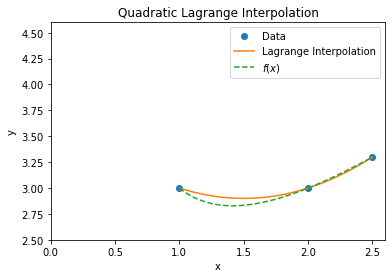

p₂(1.5) = 2.900
p₂(1.2) = 2.936


In [1]:
from numpy import array, dot, linspace
import matplotlib.pyplot as plt
%matplotlib inline

# the i-th Lagrange polynomial with respect to x
def lagrange(x, i, xData):
    n = len(xData) - 1  # the order of the polynomial
    lagrpoly = 1.
    for idx in range (n+1):
        if idx != i:
            lagrpoly *= ( x - xData[idx] ) / ( xData[i] - xData[idx])
    return lagrpoly

# Lagrange interpolation at x
def lagrange_interpolation(x, xData, yData):
    n = len(xData) - 1  # the order of the polynomial
    lagrpoly = array([lagrange(x, i, xData) for i in range(n+1)])
    y = dot(yData, lagrpoly)
    return y

xData = array([1, 2, 2.5])
yData = xData + 2 / xData

# plot
x = linspace(min(xData), max(xData), 100, endpoint=True)
y = lagrange_interpolation(x, xData, yData)
plt.title('Quadratic Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xData, yData, 'o')
plt.plot(x, y)
plt.plot(x, x + 2 / x, '--')
plt.xlim(0, 2.6)
plt.ylim(2.5, 4.6)
plt.legend(['Data', 'Lagrange Interpolation', r'$f(x)$'])
plt.show()

p15 = lagrange_interpolation(1.5, xData, yData)
p12 = lagrange_interpolation(1.2, xData, yData)

print('p₂(1.5) = %.3f' % p15)
print('p₂(1.2) = %.3f' % p12)

#### (2) Use cubic Lagrange interpolation based on the nodes $x_{0}=0.5$, $x_{1}=1$, $x_{2}=2$, and $x_{3}=2.5$ to approximate $f(1.5)$ and $f(1.2)$.

**Answer**:
$$
\begin{aligned}
p_3(x)=&\frac{(x-1)(x-2)(x-2.5)}{(0.5-1)(0.5-2)(0.5-2.5)}\times 4.5+\frac{(x-0.5)(x-2)(x-2.5)}{(1-0.5)(1-2)(1-2.5)}\times 3\\
&+\frac{(x-0.5)(x-1)(x-2.5)}{(2-0.5)(2-1)(2-2.5)}\times 3+\frac{(x-0.5)(x-1)(x-2)}{(2.5-0.5)(2.5-1)(2.5-2)}\times 3.3\\
=&-0.8x^3 + 4.8x^2 - 8.8x + 7.8
\end{aligned}
$$

So
$$
f(1.5)\approx p_3(1.5)=2.700\\
f(1.2)\approx p_3(1.2)=2.770
$$

**Script**:

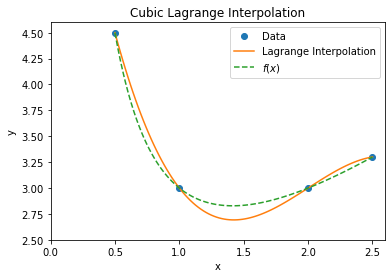

p₃(1.5) = 2.700
p₃(1.2) = 2.770


In [2]:
xData = array([0.5, 1, 2, 2.5])
yData = xData + 2 / xData

# plot
x = linspace(min(xData), max(xData), 100, endpoint=True)
y = lagrange_interpolation(x, xData, yData)
plt.title('Cubic Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xData, yData, 'o')
plt.plot(x,y)
plt.plot(x, x + 2 / x, '--')
plt.xlim(0, 2.6)
plt.ylim(2.5, 4.6)
plt.legend(['Data', 'Lagrange Interpolation', r'$f(x)$'])
plt.show()

p15 = lagrange_interpolation(1.5, xData, yData)
p12 = lagrange_interpolation(1.2, xData, yData)

print('p₃(1.5) = %.3f' % p15)
print('p₃(1.2) = %.3f' % p12)

#### (3) Compare the results of (1) and (2), and discuss on it.

The true value of $f(1.5)$ and $f(1.2)$ are 2.833 and 2.867.
$$
\left\{
\begin{aligned}
&\Delta p_2(1.5)=f(1.5)-p_2(1.5)=-0.067,\ \Delta p_2(1.2)=f(1.2)-p_2(1.2)=-0.069\\
&\Delta p_3(1.5)=f(1.5)-p_3(1.5)=0.133,\ \Delta p_3(1.2)=f(1.2)-p_3(1.2)=0.097
\end{aligned}
\right.
$$

In this case, quadratic Lagrange interpolation has less error than cubic Lagrange interpolation. The point lies in that the latter doesn't use proper data points. Because the function $f(x)$ is steep when $x<1$, the data points fetched in the range $(0,\ 1]$ should be more dense than that in the range $[1,\ 2.5]$. A data point with $x=0.5$ cannot meet this requirement, so it increases the error. We can see this effect from the above plots.

If we take $x=0.8$, which is more close to $x=1$ than $x=0.5$, as the additional data point, the error will be much smaller. (see below)

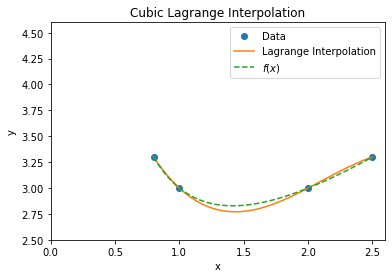

p₃(1.5) = 2.775
p₃(1.2) = 2.832
Δp₃(1.5) = 0.058, Δp₃(1.2) = 0.035


In [3]:
xData = array([0.8, 1, 2, 2.5])
yData = xData + 2 / xData

# plot
x = linspace(min(xData), max(xData), 100, endpoint=True)
y = lagrange_interpolation(x, xData, yData)
plt.title('Cubic Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xData, yData, 'o')
plt.plot(x,y)
plt.plot(x, x + 2 / x, '--')
plt.xlim(0, 2.6)
plt.ylim(2.5, 4.6)
plt.legend(['Data', 'Lagrange Interpolation', r'$f(x)$'])
plt.show()

p15 = lagrange_interpolation(1.5, xData, yData)
p12 = lagrange_interpolation(1.2, xData, yData)

print('p₃(1.5) = %.3f' % p15)
print('p₃(1.2) = %.3f' % p12)
print('Δp₃(1.5) = %.3f, Δp₃(1.2) = %.3f' % (2.833 - p15, 2.867 - p12))

#### 2. Consider the function $f(x)=\sin x$ on the interval $[0,1]$. Determine the step size $h$ so that

#### (1) linear Lagrange interpolation has an accuracy of $10^{-6}$ (i.e. find $h$ such that $\left\vert \Delta f_{1}\left(  x\right)  \right\vert<5\times10^{-7}$).

#### (2) quadratic Lagrange interpolation has an accuracy of $10^{-6}$ (i.e. find $h$ such that $\left\vert \Delta f_{2}\left(  x\right)  \right\vert<5\times10^{-7}$).

#### (3) cubic Lagrange interpolation has an accuracy of $10^{-6}$ (i.e. find $h$ such that $\left\vert \Delta f_{3}\left(  x\right)  \right\vert <5\times10^{-7}$).

$$
\begin{aligned}
\left\vert f^{\left(  2\right)  }\left(  x\right)  \right\vert  & =\left\vert
-\sin x\right\vert \leq\left\vert \sin\left(  1\right)  \right\vert
=0.84147098=M_{2},\\
\left\vert f^{\left(  3\right)  }\left(  x\right)  \right\vert  & =\left\vert
-\cos x\right\vert \leq\left\vert -\cos\left(  0\right)  \right\vert
=1=M_{3},\\
\left\vert f^{\left(  4\right)  }\left(  x\right)  \right\vert  & =\left\vert
\sin x\right\vert \leq\left\vert \sin\left(  1\right)  \right\vert
=0.84147098=M_{4}.
\end{aligned}
$$

$$
\begin{aligned}
\left\vert \Delta f_{1}\left(  x\right)  \right\vert  & \leq\frac{h_1^{2}M_{2}%
}{8},\\
\left\vert \Delta f_{2}\left(  x\right)  \right\vert  & \leq\frac{h_2^{3}M_{3}%
}{12},\\
\left\vert \Delta f_{3}\left(  x\right)  \right\vert  & \leq\frac{h_3^{4}M_{4}%
}{16}.
\end{aligned}
$$

Thus,
$$
\begin{aligned}
h_1=0.0021802707\\
h_2=0.0181712059\\
h_3=0.0555280868\\
\end{aligned}
$$

#### 3. Given the data in the following table, construct a divided differences table and interpolate at $x = 2.4$ and $x = 4.2$ using the fourth-degree Newton interpolating polynomial $p_4(x)$.

| $\ $  | $\ $ | $\ $ | $\ $ | $\ $ | $\ $ |
| ----- | ---- | ---- | ---- | ---- | ---- |
| $x_k$ | 1   | 2   | 3   | 4   | 6   |
| $f_k$ | 0.69 | 1.10 | 1.39 | 1.61 | 1.95 |

**Answer**:

| $i$ | $x_i$ | $f_i$ | 1st  | 2st  | 3st  | 4st  |
| --- | ----- | ----- | ---- | ---- | ---- | ---- |
|  0  |  1   | 0.69  | $\ $ | $\ $ | $\ $ | $\ $ |
|  1  |  2   | 1.10  | 0.41 | $\ $ | $\ $ | $\ $ |
|  2  |  3   | 1.39  | 0.29 | -0.060 | $\ $   | $\ $   |
|  3  |  4   | 1.61  | 0.22 | -0.035 | 0.0083 | $\ $    |
|  4  |  6   | 1.95  | 0.17 | -0.017 | 0.0046 | -0.00075 |

$$
\begin{aligned}
p_4(x)=&0.69+0.41(x-1)-0.060(x-1)(x-2)+0.0083(x-1)(x-2)(x-3)\\
&-0.00075(x-1)(x-2)(x-3)(x-4)\\
=&-0.00075x^4 + 0.0158x^3 - 0.13605x^2 + 0.7188x + 0.0922
\end{aligned}
$$

So
$$
f(2.4)\approx p_4(2.4)=1.23\\
f(4.2)\approx p_4(4.2)=1.65
$$

**Script**:

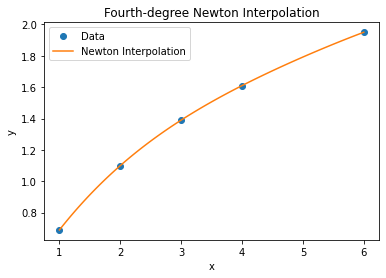

p_4(2.4) = 1.23
p_4(4.2) = 1.65


In [4]:
# the coefficients of Newton polynomials
def newton_coeff(xData, yData):
    a = yData.copy()
    m = len(xData)
    for k in range(1, m):  # m=n+1: number of data points
        for i in range(k, m):
            a[i] = (a[i] - a[k-1])/(xData[i] - xData[k-1])
    return a

# the interpolation value at x
def newton_eval(a, xData, x):
    m = len(xData)
    n = m - 1
    p = a[n]
    for k in range(1, m):
        p = a[n-k] + (x - xData[n-k]) * p
    return p

xData = array([1, 2, 3, 4, 6])
yData = array([0.69, 1.10, 1.39, 1.61, 1.95])

a = newton_coeff(xData, yData)

x = linspace(min(xData), max(xData), 100, endpoint=True)
y = newton_eval(a, xData, x)
plt.title('Fourth-degree Newton Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xData,yData, 'o')
plt.plot(x,y)
plt.legend(['Data', 'Newton Interpolation'])
plt.show()

p24 = newton_eval(a, xData, 2.4)
p42 = newton_eval(a, xData, 4.2)
print('p_4(2.4) = %.2f' % p24)
print('p_4(4.2) = %.2f' % p42)

#### 4. Consider the data for $x = 0:20$ generated by the Bessel function of the first kind of order zero $J_0(x)$. Construct and plot the cubic splines, interpolate at $x = 3.4$, and compare with the actual value at that point.
#### Hint: `scipy.special.jv` defines Bessel function of the first kind of real order and complex argument.  `scipy.special.spherical_jn` defines spherical Bessel function of the first kind or its derivative.

**Clamped boundary conditions**
$$
\begin{gathered}
S_{i}\left(  x\right)=a_{i}\left(  x-x_{i}\right)^{3}+b_{i}\left(  x-x_{i}\right)^{2}+c_{i}\left(x-x_{i}\right)+d_{i}\\
S_{1}^{\prime}(x_{1})=p=J_0'(x_1)=-J_1(x_1)\\
S_{n}^{\prime}(x_{n+1})=q=J_0'(x_{n+1})=-J_1(x_{n+1})
\end{gathered}
$$

- $d_i=f_{i}$
- $b_i$: $h_i=x_{i+1}-x_i$, solve banded matrix $\mathbf{H}$
  $$
  \begin{aligned}
  &\begin{cases}
  &(2b_1+b_2)h_1=\dfrac{3(d_2-d_1)}{h_1}-3p \\
  &b_{i-1}h_{i-1}+2b_i(h_i+h_{i-1})+b_{i+1}h_i=\dfrac{3(d_{i+1}-d_i)}{h_i}-\dfrac{3(d_i-d_{i-1})}{h_{i-1}}\\
  &(2b_{n+1}+b_n)h_n=-\dfrac{3(d_{n+1}-d_n)}{h_n}+3q\\
  \end{cases}
  \end{aligned}
  $$
  
  or
  $$
  \mathbf{H}\mathbf{b}=\mathbf{v}
  $$
 

- $a_i=\dfrac{b_{i+1}-b_i}{3h_i}$
- $c_i=\dfrac{d_{i+1}-d_i}{h_i}-\dfrac{1}{3}\left(2b_i+b_{i+1}\right)h_i$


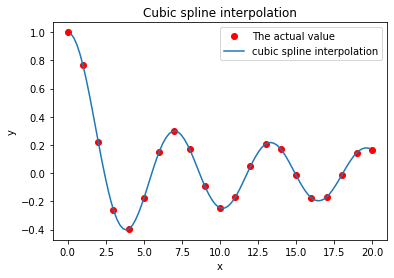

Interpolation f(3.4) = -0.363272
Actual value J0(3.4) = -0.364296


In [5]:
import numpy as np
from numpy import linalg
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline

# data (actual value)
x = np.linspace(0,20,21)
y = special.jv(0,x)

def cubic_spline_clamped(x, y, p, q):
    n = len(x) - 1  # number of splines

    d = y  # d_i = f_i

    h = np.array([x[i+1] - x[i] for i in range(n)])  # h_i = x_[i+1] -x_i

    # banded matrix H
    H = np.zeros([n+1,n+1])
    H[0][0], H[0][1] = [2 * h[0], h[0]]
    for i in range(1, n):
        H[i][i-1], H[i][i], H[i][i+1] = h[i-1], 2 * (h[i] + h[i-1]), h[i]
    H[n][n-1], H[n][n] = h[n-1], 2 * h[n-1]

    # vector v
    v = np.zeros(n+1)
    v[0] = 3 * (d[1] - d[0]) / h[0] - 3 * p
    for i in range(1, n):
        v[i] = 3 * (d[i+1] - d[i]) / h[i] - 3 * (d[i] - d[i-1]) / h[i-1]
    v[n] = -3 * (d[n] - d[n-1]) / h[n-1] + 3 * q
    
    b = linalg.solve(H, v)  # b_i
    
    a = np.array([(b[i+1] - b[i]) / 3 / h[i] for i in range(n)])  #a_i
    
    c = np.array([(d[i+1] - d[i]) / h[i] - 1 / 3 * (2 * b[i] + b[i + 1]) * h[i] for i in range(n)])  # c_i
    
    return a, b[:-1], c, d[:-1]

p = -special.jv(1, x[0])  # the derivative of J0 at x_1
q = -special.jv(1, x[-1])  # the derivative of J0 at x_[n+1]
a, b, c, d = cubic_spline_clamped(x, y, p, q)

# the interpolated function
def f(x_v):
    n = len(x) - 1
    for i in range(n):
        if x[i] < x_v < x[i+1]:
            return a[i] * (x_v - x[i])**3 + b[i] * (x_v - x[i])**2 + c[i] * (x_v - x[i]) +d[i]

# plot
plt.plot(x, y, "ro")
xnew = np.linspace(0, 20, 100)
ynew = np.array([f(i) for i in xnew])
plt.plot(xnew, ynew)
plt.title('Cubic spline interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['The actual value', 'cubic spline interpolation'])
plt.show()

f(3.4)
print('Interpolation f(3.4) = %f' % f(3.4))
print('Actual value J0(3.4) = %f' % special.jv(0, 3.4))

The interpolated value is close to the actual value and reaches precision of 2 effective numbers.

#### 5. The following table gives the value of the integral
$$
I(\alpha)=\int_{0}^{\pi/2}\frac{d\phi}{\sqrt{1-\sin^{2}\alpha\sin^{2}\phi}}
$$
#### for various values of $\alpha$. (This integral is the complete elliptical integral of the first kind.)

|   $\ $      | $\ $    | $\ $   | $\ $   | $\ $   | $\ $   |   $\ $ |
| --------------- | ------- | ------- | ------- | ------- | ------- | ------- |
| $\alpha$ ($°$) | 0     | 5     | 10    | 15     | 20    | 25     |
| $I$         | 1.57080 | 1.57379 | 1.58284 | 1.59814 | 1.62003 | 1.64900 |

#### (1) Using polynomial interpolation, find $I$ when $\alpha= 2°$.

Solve
$$
\begin{pmatrix}
1 & \alpha_0 & \alpha_0^2 & \cdots & \alpha_0^{5}\\
1 & \alpha_1 & \alpha_1^2 & \cdots & \alpha_1^{5}\\
\vdots&\vdots&\vdots&\vdots&\vdots\\
1 & \alpha_5 & \alpha_5^2 & \cdots & \alpha_5^{5}\\
\end{pmatrix}
\begin{pmatrix}
a_0\\
a_1\\
\dots\\
a_5
\end{pmatrix}=
\begin{pmatrix}
I_0\\
I_1\\
\vdots \\
I_5
\end{pmatrix}
$$

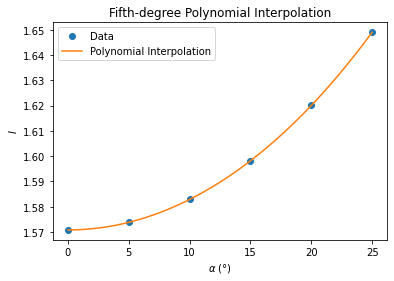

I = 1.57127 (when 𝛼 = 2°)


In [6]:
from numpy import array, pi, linspace, linalg
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
%matplotlib inline

# data
alpha_d = array([0, 5, 10, 15, 20, 25])  # unit: degree
alpha = alpha_d / 180 * pi  # unit: radian
I = array([1.57080, 1.57379, 1.58284, 1.59814, 1.62003, 1.64900])

n = len(alpha)-1  # the order of the polynomial
A = array([alpha**i for i in range(n+1)]).T  # Vandermonde matrix
a = linalg.solve(A, I)  # the coefficients of the polynomial
p = Polynomial(a)  # the polynomial interpolation

# plot
x = linspace(min(alpha_d), max(alpha_d), 100, endpoint=True)
y = p(x/180*pi)
plt.title('Fifth-degree Polynomial Interpolation')
plt.xlabel(r'$\alpha\ (°)$')
plt.ylabel(r'$I$')
plt.plot(alpha_d, I, 'o')
plt.plot(x, y)
plt.legend(['Data','Polynomial Interpolation'])
plt.show()

print('I = %.5f (when 𝛼 = 2°)' % p(2/180*pi))

#### (2) Use the trial-and-error search to find the value of $\alpha$ such that $I=1.58$.

From the table we can see that the value of $\alpha$ such that $I=1.58$ should be in the range from 5° to 10°.

In [7]:
from numpy import arange, argmin

x = arange(5/180*pi, 10/180*pi, 1e-5)  # 𝛼 ranges from 5° to 10°, step = 1e-5
index = argmin(abs(p(x)-1.58)) # the index of 𝛼 such that p(𝛼) is the most close to 1.58
alpha_158 = x[index]/pi*180  # the value of 𝛼 such that p(𝛼)=1.58

print('The value of 𝛼 such that I=1.58 is about %.1f°.' % alpha_158)

The value of 𝛼 such that I=1.58 is about 8.7°.


#### 6. The cross section measured for the resonant scattering of a neutron from a nucleus:

|  $\ $  |  $\ $  |  $\ $  |  $\ $  | $\ $   | $\ $  |  $\ $   |  $\ $   | $\ $  | $\ $  |
| ------------------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| $k$                 | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    |
| $E_k$  (MeV)        | 0    | 25   | 50   | 75   | 100  | 125  | 150  | 175  | 200  |
| $f(E_k)$  (mb)      | 10.6 | 16.0 | 45.0 | 83.5 | 52.8 | 19.9 | 10.8 | 8.25 | 4.70 |
| $\pm \sigma_k$ (mb) | 9.34 | 17.9 | 41.5 | 85.5 | 51.5 | 21.5 | 10.8 | 6.29 | 4.14 |

#### (1) The Breit-Wigner formula is given as
$$
 f(E)=\frac{f_r}{(E-E_r)^2+\Gamma^2/4} 
$$
#### Try to fit the entire data with the Breit-Wigner formula. What is your interpretation of the parameters $f_r$, $E_r$ and $\Gamma$? Use your result to predict the cross section $f(E)$ when the neutron energy $E=10, 90, 185$MeV. 

We use the method `scipy.optimize.curve_fit` with an initial guess of the parameters $f_r$, $E_r$ and $\Gamma$.

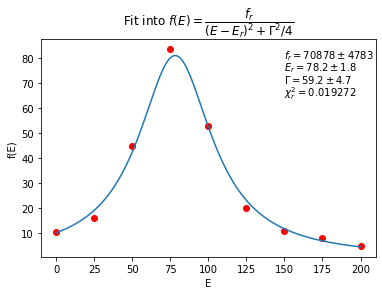

[Fitted]
The neutron energy E = 10 MeV: f(E) = 12.8 mb
The neutron energy E = 90 MeV: f(E) = 69.8 mb
The neutron energy E = 185 MeV: f(E) = 5.8 mb


In [8]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

def BreitWigner(x, f_r, E_r, gamma):
    return f_r / ((x - E_r)**2 + gamma**2 / 4)

# data
E = np.array([0,25,50,75,100,125,150,175,200])
f = np.array([10.6,16.0,45.0,83.5,52.8,19.9,10.8,8.25,4.70])
o = np.array([9.34,17.9,41.5,85.5,51.5,21.5,10.8,6.29,4.14])

p = np.array([70000, 8, 6])  # initial guess

opt, cov = curve_fit(BreitWigner, E, f, p0=p, sigma=o)  # fitting

f_r, E_r, gamma = opt  # the parameters
err = np.sqrt(np.diag(cov))  # error of the parameters

S = f - BreitWigner(E, f_r, E_r, gamma)  # the residuals
chisq = sum((S / o) ** 2)  # chi square
redchisq = chisq / (len(E) - 3)  # reduced chi square

# plot
Es = np.linspace(0, 200, 1000)
fs = BreitWigner(Es, f_r, E_r, gamma)
plt.scatter(E, f, color='r')
plt.plot(Es, fs)
plt.title(r'Fit into $f(E)=\dfrac{f_r}{(E-E_r)^2+\Gamma^2/4}$')
plt.xlabel('E')
plt.ylabel('f(E)')
plt.text(150, 80, r'$f_r=%.f\pm %.f$' % (f_r, err[0]))
plt.text(150, 75, r'$E_r=%.1f\pm %.1f$' % (E_r, err[1]))
plt.text(150, 70, r'$\Gamma=%.1f\pm %.1f$' % (gamma, err[2]))
plt.text(150, 65, r'$\chi_r^2=%f$' % redchisq)
plt.show()

print('[Fitted]')
print('The neutron energy E = 10 MeV: f(E) = {:.1f} mb'.format(BreitWigner(10, f_r, E_r, gamma)))
print('The neutron energy E = 90 MeV: f(E) = {:.1f} mb'.format(BreitWigner(90, f_r, E_r, gamma)))
print('The neutron energy E = 185 MeV: f(E) = {:.1f} mb'.format(BreitWigner(185, f_r, E_r, gamma)))

#### (2) Apply the cubic spline interpolation to predict the cross section $f(E)$ when the neutron energy $E=10, 90, 185$MeV. What kind of boundary condition you can choose for the computation? Compare the results of (1) and (2), and discuss on it.

Since the function varies slowly at the two ends $E_1=1$ and $E_9=200$, the second derivatives at $E_1=1$ and $E_9=200$ approximately vanish. So we choose natural boundary conditions
$$
S_{1}^{\prime\prime}(x_{1})=S_{n}^{\prime
\prime}(x_{n+1})=0
$$

Apply the Python package `scipy.interpolate.CubicSpline`.

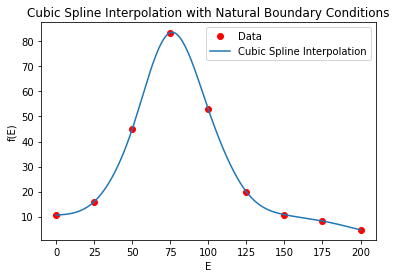

[Interpolated]
The neutron energy E = 10 MeV: f(E) = 11.3 mb
The neutron energy E = 90 MeV: f(E) = 70.5 mb
The neutron energy E = 185 MeV: f(E) = 7.0 mb


In [10]:
import numpy as np
from scipy.interpolate import CubicSpline

# data
x = np.array([0,25,50,75,100,125,150,175,200])
y = np.array([10.6,16.0,45.0,83.5,52.8,19.9,10.8,8.25,4.70])

f = CubicSpline(x, y, bc_type='natural')  # cubic spline interpolation with natural boundary conditions

# plot
plt.plot(x, y, 'ro')
Es = np.linspace(0, 200, 1000)
plt.plot(Es, f(Es))
plt.title('Cubic Spline Interpolation with Natural Boundary Conditions')
plt.xlabel('E')
plt.ylabel('f(E)')
plt.legend(['Data', 'Cubic Spline Interpolation'])
plt.show()

print('[Interpolated]')
print('The neutron energy E = 10 MeV: f(E) = {:.1f} mb'.format(f(10)))
print('The neutron energy E = 90 MeV: f(E) = {:.1f} mb'.format(f(90)))
print('The neutron energy E = 185 MeV: f(E) = {:.1f} mb'.format(f(185)))

The results of (1) and (2) are *not* very close. When fitting the data, we consider the errors $\{\sigma_k\}$,  which are relatively large. However, we assume the data has no error when doing interpolation. This is why the two results have a certain amount of difference. In fact, we believe it's better to fit the data than to inpterpolate in this case.

#### 7. The data in the following table shows the population of Canada recorded every 10 years between 1960 and 2010.

| Year | Population (millions) |
| ---- | --------------------- |
| 1960 | 17.9                  |
| 1970 | 21.3                  |
| 1980 | 24.6                  |
| 1990 | 27.8                  |
| 2000 | 30.8                  |
| 2010 | 34.1                  |

#### (1) Find the rate of population growth in 2010 using the three-point backward difference formula.

The three-point backward difference formula
$$
f'(x_i)=\frac{1}{2h}(3f_i-4f_{i-1}+f_{i-2})
$$

So
$$
r=\frac{1}{2\times 10}(3\times 34.1-4\times 30.8+27.8)=0.345
$$

The rate of population growth in 2010 is 0.345.

#### (2) Using the result of (1), and applying the two-point central difference formula, predict the population in Year 2020.

The two-point central difference formula
$$
f'(x_i)=\frac{1}{2h}(f_{i+1}-f_{i-1})
$$

So
$$
0.345=\frac{1}{2\times 10}(P_{2020}-30.8)\Rightarrow P_{2020}=37.7
$$

The population in 2020 is 37.7.

#### 8. The partial derivative $f_x(x,y)$ of $f(x,y)$ with respect to $x$ is obtained by holding $y$ fixed and differentiating with respect to $x$. Similarly, $f_y(x,y)$ is found by holding $x$ fixed and differentiating with respect to $y$. The central-difference formula can be adapted to partial derivatives
$$
\begin{aligned}
f_x(x,y)&=\frac{f(x+h,y)-f(x-h,y)}{2h}+O(h^2)\\
f_y(x,y)&=\frac{f(x,y+h)-f(x,y-h)}{2h}+O(h^2)\end{aligned} 
$$
#### Let $f(x,y)=xy/(x+y)$. Calculate approximations to $f_x(2,3)$ and $f_y(2,3)$ with $h=0.1, 0.01$, and $0.001$. Compare with the values obtained by differentiating $f(x,y)$ partially.

**Answer**:
$$
f_x(x,y)=\frac{y^2}{(x+y)^2},\ f_y(x,y)=\frac{x^2}{(x+y)^2}
$$

The true value
$$
f_x(2,3)=\dfrac{9}{25}=0.36,\ f_y(2,3)=\frac{4}{25}=0.16
$$

In [58]:
def f(x,y):
    return x * y / (x + y)

def px(f, x, y, h):  # the partial derivative with respect to x
    return (f(x + h, y) - f(x - h, y)) / (2 * h)

def py(f, x, y, h):  # the partial derivative with respect to y
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

for h in [0.1, 0.01, 0.001]:
    print('h = {}:'.format(h))
    print('fx(2,3) = %f' % px(f, 2, 3, h))
    print('fy(2,3) = %f\n' % py(f, 2, 3, h))

h = 0.1:
fx(2,3) = 0.360144
fy(2,3) = 0.160064

h = 0.01:
fx(2,3) = 0.360001
fy(2,3) = 0.160001

h = 0.001:
fx(2,3) = 0.360000
fy(2,3) = 0.160000



The partial derivatives become more close to their true values as $h$ is  getting smaller.